## First, let's execute tasks sequentially

In [1]:
import time
import random

def inc(x):
    time.sleep(random.random())
    return x + 1

def dec(x):
    time.sleep(random.random())
    return x -1

def add(x, y):
    time.sleep(random.random())
    return x + y 

In [2]:
%%time

x = inc(1)
y = dec(2)
z = add(x, y)
z

CPU times: user 1.65 ms, sys: 303 µs, total: 1.95 ms
Wall time: 1.5 s


3

The `inc()` and `dec()` functions can be run independent of each other and therefore, can be run in parallel if we choose to.

## Now, let's use Dask `delayed` to execute tasks in parallel

In [3]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:45207")
client

Client Scheduler: tcp://127.0.0.1:45207 Dashboard: http://127.0.0.1:42291/status,Cluster Workers: 4 Cores: 4 Memory: 8.13 GB


By adding `@dask.delayed` decorator, the functions will be executed `lazily`.

In [4]:
import time
import random
import dask

@dask.delayed
def inc(x):
    time.sleep(random.random())
    return x + 1

@dask.delayed
def dec(x):
    time.sleep(random.random())
    return x -1

@dask.delayed
def add(x, y):
    time.sleep(random.random())
    return x + y 

In [5]:
%%time

x = inc(1)
y = dec(2)
z = add(x, y)
z

CPU times: user 3.05 ms, sys: 0 ns, total: 3.05 ms
Wall time: 3.38 ms


Delayed('add-079715db-36c6-467e-acbf-6d9ff163d5da')

`z` is a Dask delayed object and doesn't compute anything.  It does however, records all the calls that are necessary in order to produce the final result.

## Visualize Computation

You will need graphviz installed (both the Python package (pip install graphviz) and 3rd party [library](https://graphviz.org/))

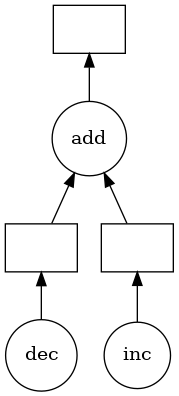

In [6]:
z.visualize()

## Run in parallel

In [7]:
z.compute()

3

So dask delayed is useful because it provides both parallel task execution and task dependency.  We see that `add` won't happen until `inc` and `dec` tasks have completed or executed first.